In [1]:
import numpy as np
import pandas as pd
import gzip
from rdkit import DataStructs
from rdkit import RDLogger
from rdkit import Chem

RDLogger.DisableLog('rdApp.error')

In [43]:
# read csv into pandas dataframe

df = pd.read_csv('../data/chembl_mtor_ic50.csv', sep=';')

# get columns names
#print(df.columns)

# take only pchembl_value and canonical_smiles columns
df = df[['pChEMBL Value', 'Smiles']]
df

,pChEMBL Value,Smiles
0,7.35,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...
1,NaN,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1
2,NaN,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1
3,6.14,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...
4,NaN,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...
...,...,...
4591,NaN,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...
4592,NaN,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...
4593,6.64,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...
4594,6.84,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO


In [44]:
# calculate MQN descriptors for each molecule
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors

df['mol'] = df['Smiles'].apply(lambda x: Chem.MolFromSmiles(x))

df_mqn = pd.DataFrame((rdMolDescriptors.MQNs_(x) for x in df["mol"]), columns=[*(f"MQN_{x}" for x in range(1,43))])
df = pd.concat([df, df_mqn], axis=1).drop(columns=['Smiles', 'mol'])
df.dropna(inplace=True)
df

,pChEMBL Value,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,MQN_8,MQN_9,...,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41,MQN_42
0,7.35,19,1,0,0,0,2,0,2,3,...,0,0,1,3,0,0,0,0,2,1
3,6.14,19,1,0,0,0,2,0,2,3,...,0,0,1,3,0,0,0,0,2,1
5,5.82,22,0,0,0,0,2,0,2,1,...,0,0,1,3,0,0,0,0,2,1
7,5.78,16,0,0,0,0,0,0,0,4,...,0,0,1,3,0,0,0,0,2,1
8,7.52,21,0,0,0,0,0,0,0,4,...,0,0,1,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,7.41,24,0,0,0,0,0,0,2,4,...,0,1,0,4,0,0,0,0,2,1
4589,6.68,28,1,0,0,0,1,0,1,4,...,1,0,1,4,0,0,0,0,2,1
4590,8.33,20,2,1,0,0,1,0,1,3,...,0,0,0,4,0,0,0,0,2,1
4593,6.64,25,0,0,0,0,0,0,1,2,...,0,0,1,4,0,0,0,0,4,2


In [28]:
# split data into train and test set
from sklearn.model_selection import train_test_split

X = df.drop(columns=['pChEMBL Value'])
y = df['pChEMBL Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,MQN_8,MQN_9,MQN_10,...,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41,MQN_42
2656,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0
3892,28.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,18.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,6.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1804,22.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
705,15.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,20.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,1.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0
1373,25.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1581,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0
1032,24.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,2.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0


RMSE: 1.2971386449899707
R2: -0.19593583854938812


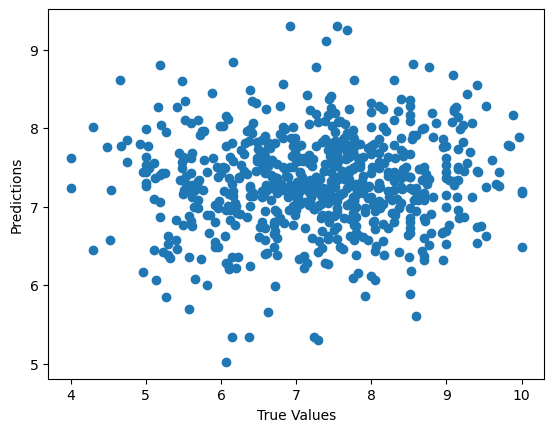

In [39]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

# plot results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

RMSE: 37986501236.23204
R2: -1.0256369844304248e+21


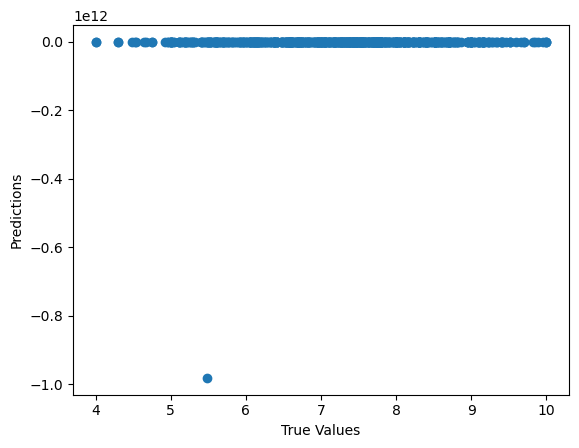

In [31]:
# do linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# evaluate model
y_pred = lr.predict(X_test)

print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

# plot results
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

numpy.float64